In [7]:
import os
import re
import sys
import glob
import time
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

import math
from scipy          import stats
from scipy.optimize import curve_fit

from matplotlib.colors import LogNorm

from functools import partial

In [3]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [4]:
import matplotlib

# Set Palatino as the serif font
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif']  = 'Palatino'

In [5]:
fav_col = '#418094'

In [8]:
start_time = time.time()

filename = '/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-11_25_2024-file_100.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

all_chs      = range(13)
max_smpl_bsl = 650
thr_ADC_pmt  = 20
min_dist_pmt = 15

## Thr values valid from 9/10/2024 since the bias voltage was changed
std_thr_dict = {0: 13,
                1: 13,
                2: 13,
                3: 13,
                4: 14,
                5: 13,
                6: 12,
                7: 13,
                8: 13,
                9: 30,
                10: 40,
                11: 40,
                12: 4}

ch    = 12
wfs   = pf.wfs_from_rawtree(RawTree, ch)
swfs  = np.array([blr.pmt_deconvolver(wf, wf_range_bsl=(0, max_smpl_bsl), baseline_mode=False, std_lim=3*std_thr_dict[ch]) for wf in wfs])
zswfs = pf.noise_suppression(swfs, threshold=thr_ADC_pmt)
partial_get_peaks_peakutils = partial(pf.get_peaks_peakutils, thres=thr_ADC_pmt, min_dist=min_dist_pmt, thres_abs=True)
idx_peaks_max               = np.array(list(map(partial_get_peaks_peakutils, zswfs)),   dtype=object)
height_peaks                = np.array(list(map(pf.peak_height, zswfs, idx_peaks_max)), dtype=object)
integral_peaks, len_peaks   = pf.area_and_len_of_peaks_no_concat(zswfs, idx_peaks_max)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} s, {elapsed_time/60} mins")

Elapsed time: 23.47602105140686 s, 0.39126701752344767 mins


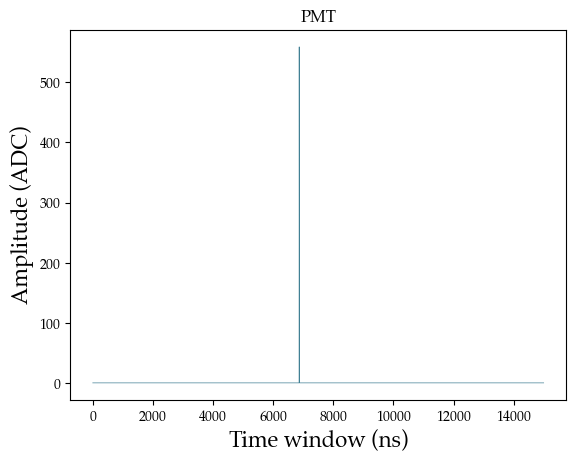

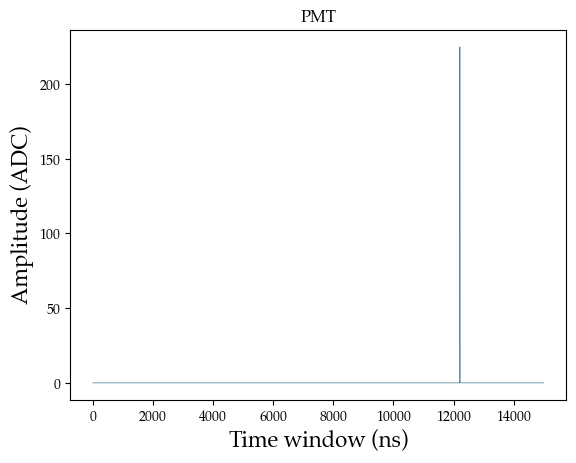

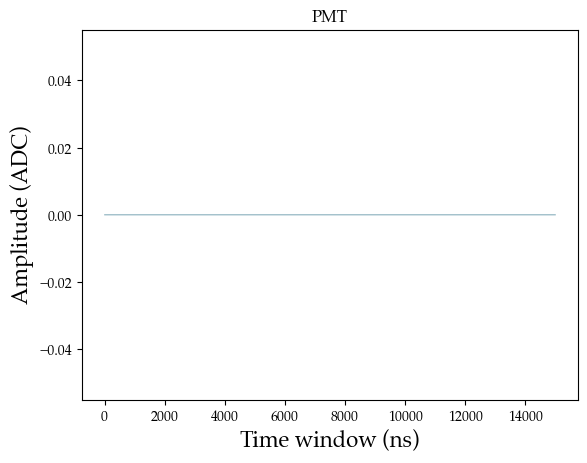

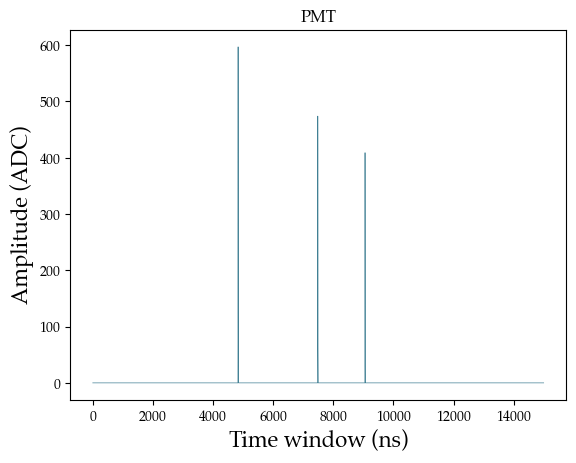

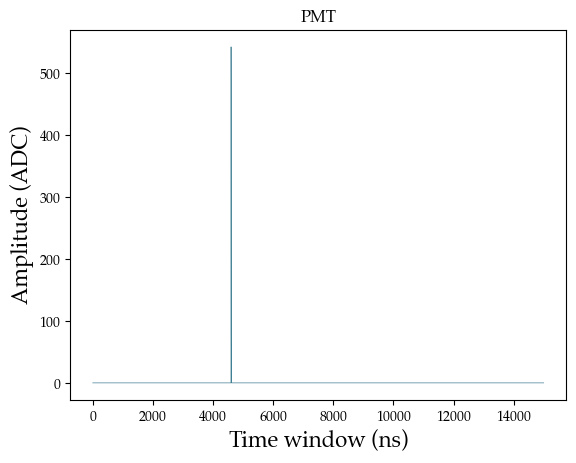

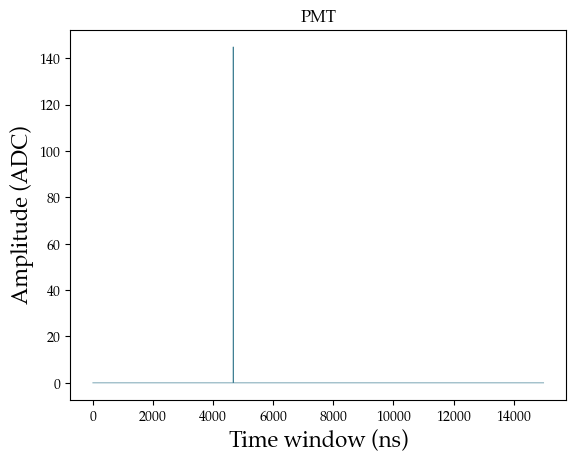

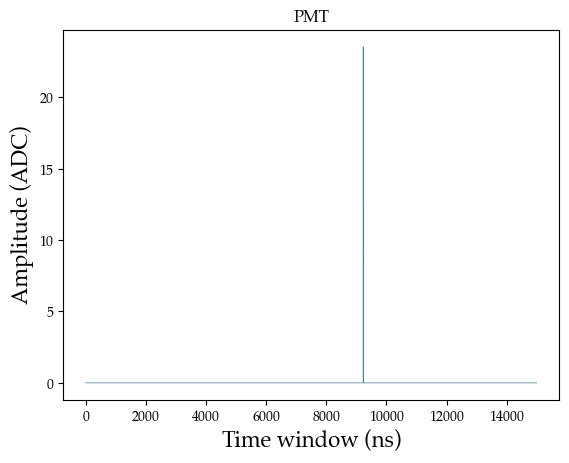

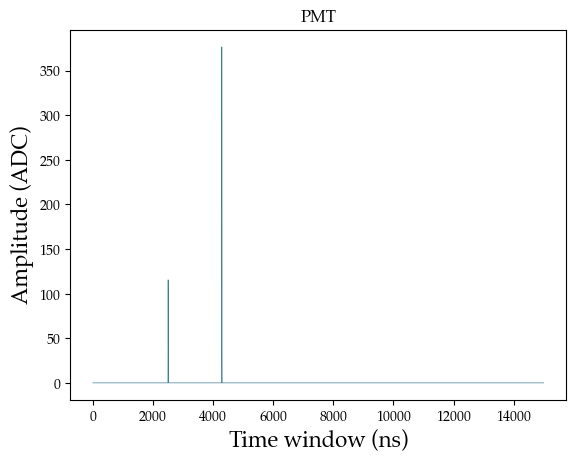

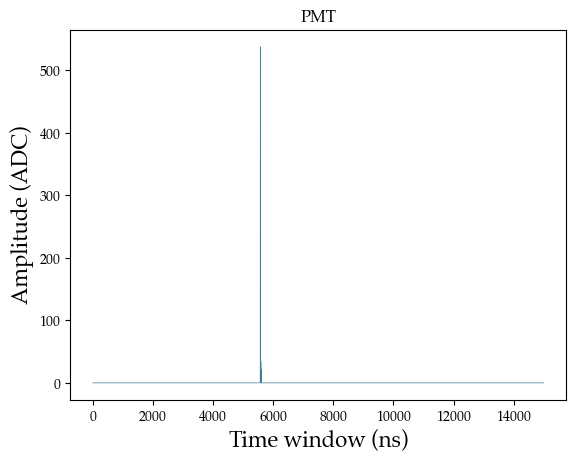

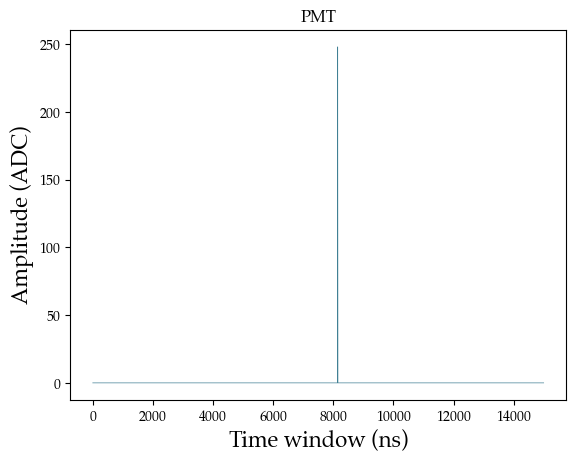

In [10]:
for zwf in zswfs[:10]:
    plt.plot(2*np.arange(len(zwf)), zwf, lw=0.5, c=fav_col)
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADC)',  fontsize=16)
    plt.title('PMT')
    plt.show()

In [11]:
zswfs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
non_zero_indices   = np.where(np.any(zswfs != 0, axis=1))[0]
filtered_waveforms = zswfs[non_zero_indices]

In [17]:
len(filtered_waveforms)

15418

In [18]:
non_zero_indices

array([    0,     1,     3, ..., 21971, 21972, 21973])